In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

1. Download the data from the above link. How many ".csv" files are available in the dataset?

In [2]:
df_movies = pd.read_csv('movies.csv')

In [3]:
df_movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [5]:
df_ratings = pd.read_csv('ratings.csv')

In [6]:
df_ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [7]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
df_links = pd.read_csv('links.csv')

In [9]:
df_links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [10]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [11]:
df_tags = pd.read_csv('tags.csv')

In [12]:
df_tags.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [13]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


2. What is the shape of "movies.csv"?

In [14]:
df_movies.shape

(9742, 3)

3. What is the shape of "ratings.csv"?

In [15]:
df_ratings.shape

(100836, 4)

4. How many unique "userId" are available in "ratings.csv"?

In [16]:
len(df_ratings['userId'].unique())

610

5. Which movie has recieved maximum number of user ratings?

In [17]:
df = df_movies.merge(df_ratings, on= 'movieId' ) # Joining df_movies and df_ratings on 'movieId' column

In [18]:
df.groupby(['title'])[['userId']].count()\
.sort_values(by = 'userId' , ascending = False).head(1)\
.rename(columns={"userId":"No_of_user_ratings"})              

,No_of_user_ratings
title,
Forrest Gump (1994),329


6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [19]:
df = df_movies.merge(df_tags, on= 'movieId' )      # Joining df_movies and df_tags on 'movieId' column

In [20]:
df[df['title'] == 'Matrix, The (1999)'][['title','tag']]    # Appling the condition

,title,tag
1313,"Matrix, The (1999)",martial arts
1314,"Matrix, The (1999)",sci-fi
1315,"Matrix, The (1999)",alternate universe
1316,"Matrix, The (1999)",philosophy
1317,"Matrix, The (1999)",post apocalyptic


7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [21]:
df = df_movies.merge(df_ratings, on= 'movieId' )   # Joining df_movies and df_ratings on 'movieId' column

In [22]:
avg_ratings = df.groupby(['title'])[['rating']].mean().reset_index()\
.rename(columns={"rating":"avg_rating"})

In [23]:
avg_ratings[avg_ratings['title'] == "Terminator 2: Judgment Day (1991)"]    # Appling the condition

,title,avg_rating
8363,Terminator 2: Judgment Day (1991),3.970982


8. How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [24]:
df = df_movies.merge(df_ratings, on= 'movieId' )     # Joining df_movies and df_ratings on 'movieId' column

In [25]:
df_1 = df[df['title'] == 'Fight Club (1999)']        # Appling the condition

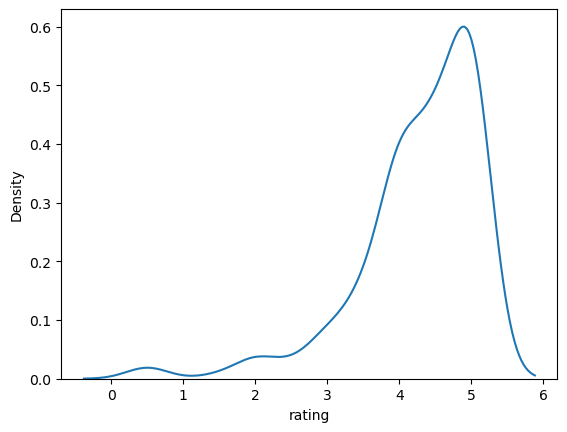

In [26]:
sns.kdeplot(data = df_1 , x =df_1['rating'])
plt.show()

🟢 IMPORTANT NOTE 1 🟢

Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [27]:
grouped_rating_df = df_ratings.groupby(['movieId'])['rating'].agg(['count','mean']).reset_index()\
.rename(columns={"mean":"avg_rating" , 'count' : 'No_of_user_ratings'})

In [28]:
df = df_movies.merge(grouped_rating_df, on = 'movieId')

In [29]:
movies_ratings = df[df['No_of_user_ratings'] > 50]

9. Which movie is the most popular based on  average user ratings?

In [30]:
movies_ratings[movies_ratings['avg_rating'] == movies_ratings['avg_rating'].max()]['title']

277    Shawshank Redemption, The (1994)
Name: title, dtype: object

10. Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [31]:
movies_ratings.sort_values(by = 'No_of_user_ratings' , ascending = False).head(5)

,movieId,title,genres,No_of_user_ratings,avg_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


11. Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [32]:
movies_ratings[movies_ratings['genres'].str.contains("Sci-Fi")]\
.sort_values(by = 'No_of_user_ratings' , ascending = False).iloc[[2]]

,movieId,title,genres,No_of_user_ratings,avg_rating
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.75


🟢 IMPORTANT NOTE 2 🟢

You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

In [33]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class':"sc-bde20123-1 cMEQkK"})
    return imdb_rating.text if imdb_rating else np.nan

In [34]:
movies_imdb_ratings = movies_ratings.merge(df_links , on = 'movieId')

In [35]:
imdb_rating = []
for imdbid in movies_imdb_ratings['imdbId']:
    imdb_rating.append(float(scrapper(imdbid)))

In [36]:
movies_imdb_ratings['imdb_rating'] = imdb_rating

In [37]:
movies_imdb_ratings.head(2)

,movieId,title,genres,No_of_user_ratings,avg_rating,imdbId,tmdbId,imdb_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1


12. Mention the movieId of the movie which has the highest IMDB rating.

In [38]:
movies_imdb_ratings[movies_imdb_ratings['imdb_rating'] == movies_imdb_ratings['imdb_rating'].max()][['movieId']]

,movieId
53,318


13. Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [39]:
df = movies_imdb_ratings[movies_imdb_ratings['genres'].str.contains("Sci-Fi")]

In [40]:
df[df['imdb_rating'] == df['imdb_rating'].max()][['movieId']]

,movieId
424,79132
